# Forecasting With The Kalman Filter

In [10]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

- Using dev version of StatsModels (8.0)
- There are two versions of the Kalman filter in the tsa module

- State-Space Models
- Filter, Prediction (forecasting), smoothing
- Predicting new (conditional) distributions
- AR(p) model in state space
- SARIMAX



## What Is the Kalman Filter

[Biography](http://www-history.mcs.st-and.ac.uk/Biographies/Kalman.html)

The term _filter_ hints at origins in signal processing/information theory.

Suppose we have a time series defined like this:

$$
\begin{align}
\alpha_{t+1} & = \alpha_{t} + \eta_t  & \eta_t \sim N(0, \sigma_{\eta}) \\
\end{align}
$$

Basically a random walk

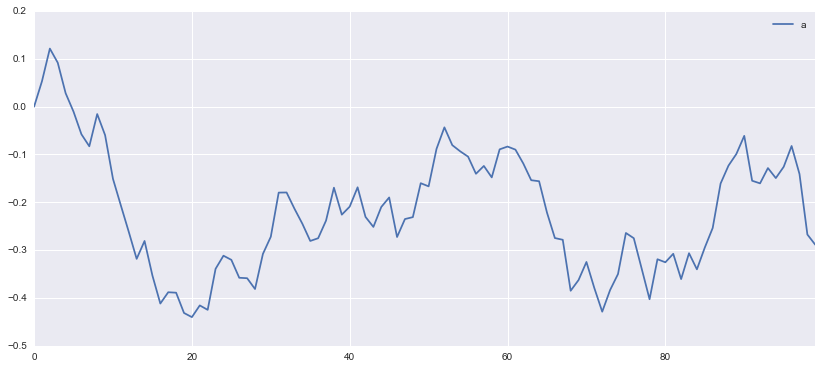

In [11]:
h = np.random.normal(0, 0.05, 100)
h[0] = 0.0
a = np.cumsum(h)

df = pd.DataFrame(a, columns=['a'])
_=df.plot(figsize=(14,6))

Now we introduce a second time series that's just the original series, plus some noise:

$$
\begin{align}
y_t & = \alpha_t + \varepsilon_t \qquad & \varepsilon_t \sim
    N(0, \sigma_\varepsilon^2) \\
\end{align}
$$

Below are two versions of y with different variances

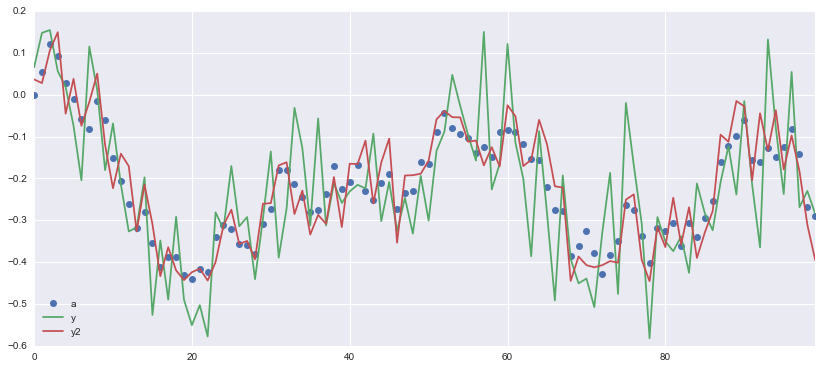

In [12]:
e = np.random.normal(0, 0.1, 100)
e2 = np.random.normal(0, 0.05, 100)
df['y'] = a + e
df['y2'] = a + e2
_=df.plot(figsize=(14,6), style=['o', '-', '-'])

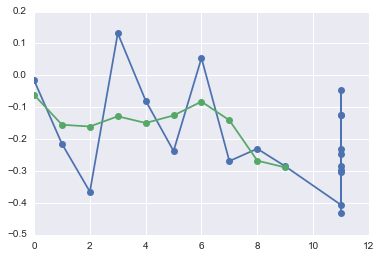

In [13]:
y_next = []
for i in range(10):
    a_next = df.a.iloc[-1] + np.random.normal(0, 0.05)
    y_next.append(a_next + np.random.normal(0, 0.1))
plt.plot(list(range(10)) + [11] * 10, np.append(df.y.iloc[-10:],y_next), marker='o')
plt.plot(list(range(10)), df.a.iloc[-10:], marker='o')

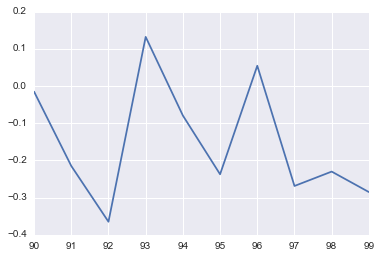

In [14]:
df.y.iloc[-10:].plot()

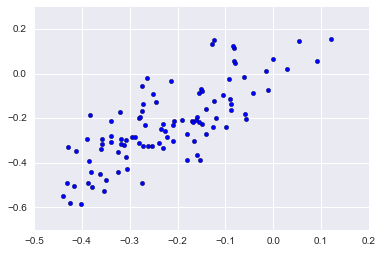

In [15]:
plt.scatter(x=df.a, y=df.y)

State-Space Models
Filter, Prediction (forecasting), smoothing
Predicting new (conditional) distributions
AR(p) model in state space
SARIMAX

In [16]:
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter

kf = KalmanFilter(1,1)

kf.bind(df.y.values)
kf.initialize_known(np.array([0.0]), np.array([[10.0]]))
kf.obs_cov = np.array([0.1])
kf.state_cov = np.array([0.05])
kf.design = np.array([1.0])
kf.transition = np.array([1.0])
kf.selection = np.array([1.0])
r = kf.filter()

ys, ah = kf.simulate(100)

10.1
0.2490099009900991
0.2098409542743539
0.20234486025580295
0.2005794217488002
0.2001444369875405
0.20003608318815014
0.20000901916983554
0.2000022546907817
0.20000056366634097
0.2000001409161881
0.2000000352290222
0.20000000880725402
0.2000000022018134
0.20000000055045336
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.2

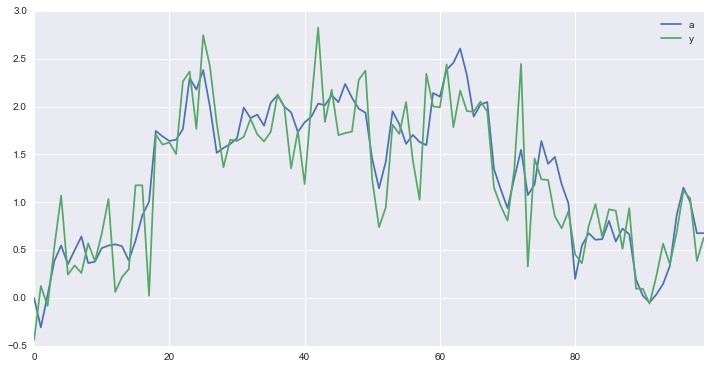

In [17]:
pd.DataFrame({'y': ys.flatten(), 'a': ah.flatten()}).plot(figsize=(12,6))

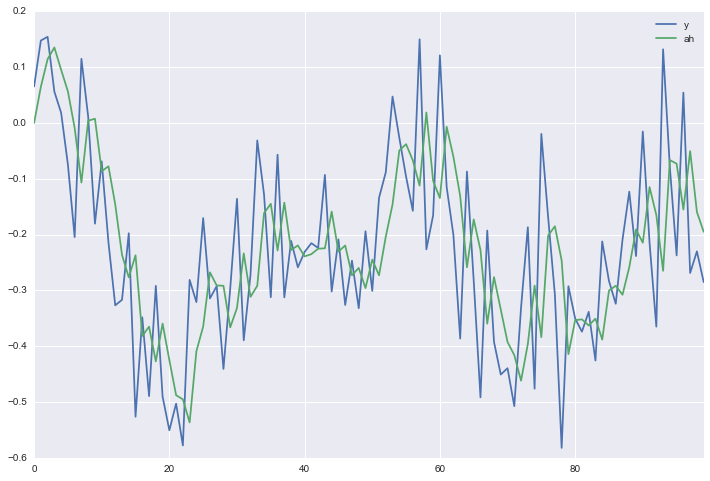

In [18]:
df['ah'] = r.predicted_state[0][0:-1]
df[['y','ah']].plot(figsize=(12,8))

In [19]:
pr = r.predict(100,110)
len(pr.results.predicted_state[0])

10.1
0.2490099009900991
0.2098409542743539
0.20234486025580295
0.2005794217488002
0.2001444369875405
0.20003608318815014
0.20000901916983554
0.2000022546907817
0.20000056366634097
0.2000001409161881
0.2000000352290222
0.20000000880725402
0.2000000022018134
0.20000000055045336
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.20000000013761335
0.2

111

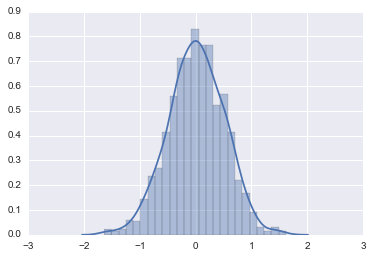

In [20]:
xx = []
for i in range(1000):
    h = np.random.normal(0, 0.05, 100)
    xx.append(np.cumsum(h)[-1])
    
sns.distplot(xx)

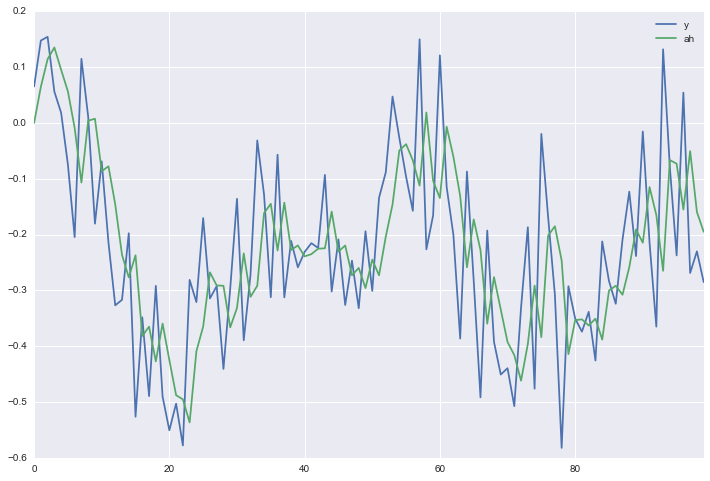

In [21]:
df[['y','ah']].plot(figsize=(12,8))

In [22]:
dir(r)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_attributes',
 '_filter_attributes',
 '_filter_options',
 '_kalman_gain',
 '_model_attributes',
 '_predict',
 '_standardized_forecasts_error',
 'conserve_memory',
 'converged',
 'design',
 'dtype',
 'endog',
 'filter_conventional',
 'filter_method',
 'filtered_state',
 'filtered_state_cov',
 'forecasts',
 'forecasts_error',
 'forecasts_error_cov',
 'initial_state',
 'initial_state_cov',
 'initial_variance',
 'initialization',
 'inversion_method',
 'invert_cholesky',
 'invert_lu',
 'invert_univariate',
 'k_endog',
 'k_posdef',
 'k_states',
 'kalman_gain',
 'llf_obs',
 'loglikelihood_burn',
 'memory_conserve',
 'memory_no_filtered',
 'memory_no

In [25]:
next(r)

TypeError: 'FilterResults' object is not an iterator